# Practical 1: Position and Orientation

We first import the required dependencies

In [1]:
# this line tells Jupyter that we are rendering plots in "notebook" style
%matplotlib notebook

# import libraries we need
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import sys
import os
sys.path.insert(0, os.path.abspath('Practical1_Support'))
from NotebookCheck import *
from Frames2D import *
from Frames3D import *

# Testing the Notebook First

To make sure that your notebook instance has been created correctly, please execute the code below. 

You should see the plot change as you move the slider. 

**FLUX Question:** What word is shown when $\omega=10$ the end?

<IPython.core.display.Javascript object>


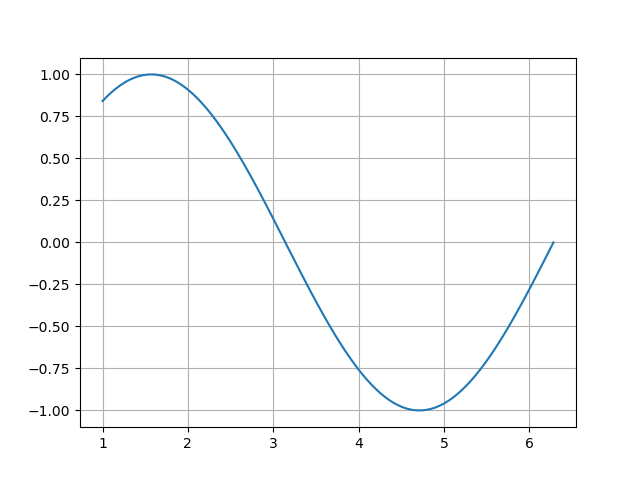

In [2]:
test = NotebookChecker()

## 1. Rotations in 2D

We define a 2D coordinate frame to represent our robot $(\boldsymbol{x}_1, \boldsymbol{y}_1)$ with respect to the world frame $(\boldsymbol{x}_0, \boldsymbol{y}_0)$. 

Given an angle $\theta$, we describe the relation between the world and robot's frames using the following rotation matrix $R_{01} = \begin{vmatrix}cos\theta & -sin\theta \\sin\theta & cos\theta \end{vmatrix}$.

Below we show how the robot's frame (green and red arrows) changes relative to the world frame (blue) as the angle $\theta$ increases or decreases.

**Interaction**:
- Move the slider to change the rotation angle around the origin

In [3]:
'''
 Here we define the interactive widgets we can use to rotate the robot's frame w.r.t to the world frame: 
 - theta_slider controls the angle
 - txt_matrix is used to display the current rotation matrix

'''
theta_slider = widgets.FloatSlider(value=0, min=-2, max=2, step=.1, description=r'$\theta$ (rad)',
                               continuous_update=True)
txt_matrix = widgets.Textarea(value="{}".format(np.eye(2)), placeholder='', description=r'$R_{01}$', disabled=True)
controls = widgets.HBox([theta_slider, txt_matrix])

<IPython.core.display.Javascript object>


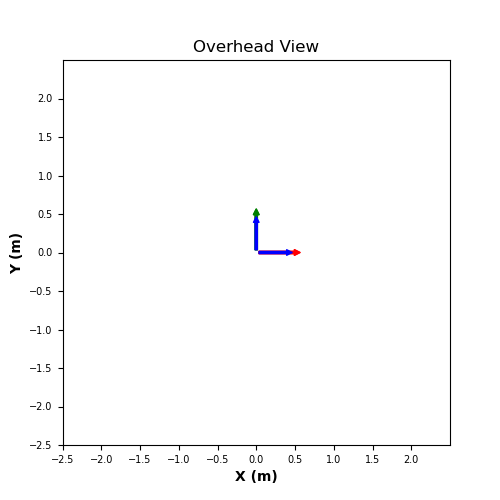

In [4]:
# Here we plot the robot and world frames
ex_rotation = Rotation2D()

# Here we build a rotation matrix based on the theta value coming from theta_slider
def rotate(change):
    r_theta = change.new*np.pi
    cos_theta = np.cos(r_theta)
    sin_theta = np.sin(r_theta)
        
    rot_mat = np.array([[cos_theta, -sin_theta],
                       [sin_theta, cos_theta]])
    ex_rotation.update_frame({"rotation": rot_mat})
    txt_matrix.value = "{}".format(np.round(rot_mat,2))
    
# Here we display the interactive widgets. Move the slider to compute a new rotation matrix
theta_slider.observe(rotate, 'value')
display(controls)

**FLUX Question:** What is the value of the rotation matrix when $\theta=\frac{\pi}{2}$ (0.5 in the slider)?

## 2. Rotations in 3D

Let us now extend the definition of rotations to a 3-dimensional world.

Recall that $R_{x}(\theta) = \begin{vmatrix}1 & 0 & 0 \\ 0 & cos\theta & -sin\theta \\ 0 & sin\theta & cos\theta \end{vmatrix}$, $R_{y}(\theta) = \begin{vmatrix} cos\theta & 0 & sin\theta \\ 0 & 1 & 0 \\ -sin\theta & 0 & cos\theta \end{vmatrix}$, and $R_{z}(\theta) = \begin{vmatrix}cos\theta & -sin\theta & 0 \\ sin\theta & cos\theta & 0 \\ 0 & 0 & 1 \end{vmatrix}$

**Interaction**:
- Move the sliders to change the rotation angle around each axis
- Click on a button to change the composition order of the rotation matrices

**TO DO**:
- Complete the definition of $R_y(\theta)$
- Implement the $y$-$z$-$x$ and $z$-$x$-$y$ rotation orders

In [5]:
'''
 Here we create all the interactive widgets used to rotate the robot's frame w.r.t to the world frame: 
 - Use <axis>_theta_slider to control rotation angle for a given axis
 - txt_matrix is used to display the current rotation matrix
 - rot_order specifies the composition order of all rotation matrices

'''

# Widget layout
matrix_layout = widgets.Layout(flex='0 1 auto', height='120px', min_height='10px', width='auto')

# X axis widgets
x_theta_slider = widgets.FloatSlider(value=0, min=-2, max=2, step=.1, description=r'$\theta_x$ (rad)',
                                     continuous_update=True)
# Y axis widgets
y_theta_slider = widgets.FloatSlider(value=0, min=-2, max=2, step=.1, description=r'$\theta_y$ (rad)',
                                     continuous_update=True)
# Z axis widgets
z_theta_slider = widgets.FloatSlider(value=0, min=-2, max=2, step=.1, description=r'$\theta_z$ (rad)',
                                     continuous_update=True)
# Composition order widgets
rot_order = widgets.ToggleButtons(options=['x-z-y', 'z-x-y', 'y-z-x'], description='Comp. order:', 
                                  disabled=False, button_style='', orientation='vertical')

# Field to display rotation matrix
txt_matrix = widgets.Textarea(value="{}".format(np.eye(3)), placeholder='', 
                              description=r'$R_{\text{composite}}$', 
                              disabled=True, layout=matrix_layout)

def reset_sliders(obj=None):
    x_theta_slider.value = 0
    y_theta_slider.value = 0
    z_theta_slider.value = 0


<IPython.core.display.Javascript object>


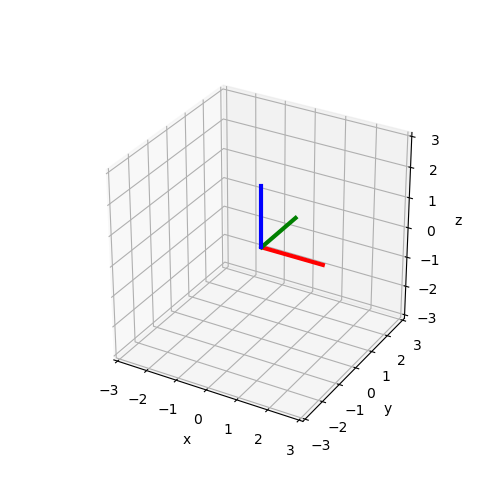

Output()

In [6]:
# Here we plot the robot and world frames
ex_rotation = Frame3D()

# Here we build a rotation matrix based on the theta value coming from theta_slider
def rotate(x, y, z):
    x_theta = x*np.pi
    y_theta = y*np.pi
    z_theta = z*np.pi
        
    rot_x = np.eye(3)
    rot_y = np.eye(3)
    rot_z = np.eye(3)
    
    rot_x[1:, 1:] = [[np.cos(x_theta), -np.sin(x_theta)],
                     [np.sin(x_theta), np.cos(x_theta)]]        
    rot_z[0:2, 0:2] = [[np.cos(z_theta), -np.sin(z_theta)],
                      [np.sin(z_theta), np.cos(z_theta)]]
    
    #------------------ TODO -------------------------
    #              Update rot_y
    rot_y[0:3, 0:3] = [[np.cos(y_theta), 0, np.sin(y_theta)],
                      [0, 1, 0],
                      [-np.sin(y_theta), 0, np.cos(y_theta)]]
    #-------------------------------------------------
    composition_order = rot_order.value
        
    if composition_order == 'x-z-y':
        rot_mat = np.matmul(rot_y, np.matmul(rot_z, rot_x))    
    
    # ------------TODO 2: Complete rotation order z-x-y----------------
    elif composition_order == 'z-x-y':
        #------------------ TODO -------------------------
        #        Complete rotation order z-x-y
        rot_mat = np.matmul(rot_y, np.matmul(rot_x, rot_z))
        #-------------------------------------------------
    else:
        #------------------ TODO -------------------------
        #        Complete rotation order y-z-x
        rot_mat = np.matmul(rot_x, np.matmul(rot_z, rot_y))
        #-------------------------------------------------
    
    ex_rotation.rotate_frame(rot_mat)
    txt_matrix.value = "{}".format(np.round(rot_mat,2))
            
# Here we display the interactive widgets. Move the slider to compute a new rotation matrix

sliders = widgets.VBox([x_theta_slider, y_theta_slider, z_theta_slider])
out = widgets.interactive_output(rotate, {'x': x_theta_slider, 'y': y_theta_slider, 'z': z_theta_slider})
controls = widgets.VBox([rot_order, widgets.HBox([sliders, txt_matrix])])
rot_order.observe(reset_sliders)
display(controls, out)

**FLUX Question**: Are the rotations expressed in fixed or successive frame? 

# 3. Homogeneous Transformations in 3D

Let us now combine rotations and translations in a 3-dimensional world.

Recall that $T_{01} = \begin{vmatrix} R_{01} & \boldsymbol{d}^0_1\\ 0 & 1\end{vmatrix}$, where $R_{01}$ and $\boldsymbol{d}^0_1$ correspond to the rotation and displacement of the robot frame, i.e, *frame 1*, relative to the world frame, i.e., *frame 0*.

**Interaction**:
- Move the sliders to change the rotation and displacement of the robot frame relative to each axis in the world frame

**TO DO**:
- Complete the definition of $T_{01}$ along the $z$-axis

In [7]:
'''
 Here we create all the interactive widgets used to rotate the robot's frame w.r.t to the world frame: 
 - Use <axis>_theta_slider to control rotation angle for a given axis
 - txt_matrix is used to display the current rotation matrix
 - rot_order specifies the composition order of all rotation matrices

'''

# Widget layout
matrix_layout = widgets.Layout(flex='0 1 auto', height='120px', min_height='10px', width='auto')

# X axis widgets
x_theta_slider = widgets.FloatSlider(value=0, min=-2, max=2, step=.1, description=r'$\theta_x$ (rad)',
                                     continuous_update=True)
x_disp_slider = widgets.FloatSlider(value=0, min=-2, max=2, step=.1, description=r'$\boldsymbol{d}_x$',
                                     continuous_update=True)
# Y axis widgets
y_theta_slider = widgets.FloatSlider(value=0, min=-2, max=2, step=.1, description=r'$\theta_y$ (rad)',
                                     continuous_update=True)
y_disp_slider = widgets.FloatSlider(value=0, min=-2, max=2, step=.1, description=r'$\boldsymbol{d}_y$',
                                     continuous_update=True)
# Z axis widgets
z_theta_slider = widgets.FloatSlider(value=0, min=-2, max=2, step=.1, description=r'$\theta_z$ (rad)',
                                     continuous_update=True)
z_disp_slider = widgets.FloatSlider(value=0, min=-2, max=2, step=.1, description=r'$\boldsymbol{d}_z$',
                                     continuous_update=True)
# Field to display rotation matrix
txt_matrix = widgets.Textarea(value="{}".format(np.eye(3)), placeholder='', 
                              description=r'$T_{\text{composite}}$', 
                              disabled=True, layout=matrix_layout)

def reset_sliders(x=False, y=False, z=False):
    if x:
        x_theta_slider.value = 0
        x_disp_slider.value = 0
    
    if y:
        y_theta_slider.value = 0
        y_disp_slider.value = 0
    
    if z:
        z_theta_slider.value = 0
        z_disp_slider.value = 0

rotations = widgets.VBox([x_theta_slider, y_theta_slider, z_theta_slider])
translations = widgets.VBox([x_disp_slider, y_disp_slider, z_disp_slider])
controls = widgets.HBox([rotations, translations, txt_matrix])

<IPython.core.display.Javascript object>


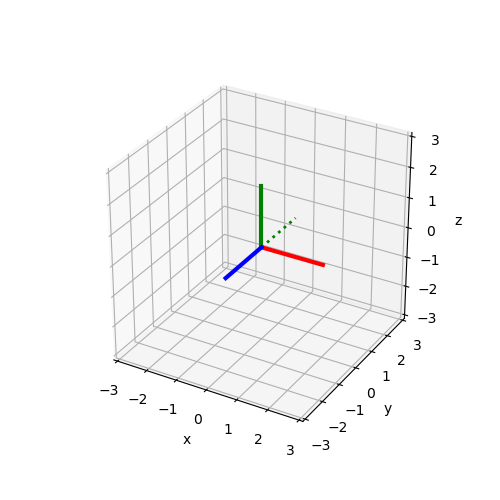

Output()

Output()

Output()

In [8]:
# Here we plot the robot and world frames
ex_rotation = Frame3D()

def transform_frame(rotation, translation):
    new_transform = np.matmul(rotation, translation)
    ex_rotation.apply_transform(new_transform)
    txt_matrix.value = "{}".format(np.round(new_transform, 2))

# Here we define all homogeneous transform
def x_transform(theta, x):
    x_theta = theta*np.pi
    trans = np.eye(4)
    rot = np.eye(4)
    
    # Assign displacement in x direction
    trans[0,-1] = x
    # Assign rotation around x_axis
    rot[1:3, 1:3] = [[np.cos(x_theta), -np.sin(x_theta)],
                      [np.sin(x_theta), np.cos(x_theta)]]
    transform_frame(rot, trans)
    reset_sliders(y=True, z=True)
            
def y_transform(theta, y):
    y_theta = theta*np.pi
    trans = np.eye(4)
    rot = np.eye(4)

    # Assign displacement in y direction
    trans[1,-1] = y
    # Assign rotation around y_axis
    rot[0, 0:3] = [np.cos(y_theta), 0, np.sin(y_theta)]
    rot[2, 0:3] = [-np.sin(y_theta), 0, np.cos(y_theta)]
    transform_frame(rot, trans)
    reset_sliders(x=True, z=True)

def z_transform(theta, z):
    # --------------- TODO: Complete definition of z-axis homogeneous transform -----
    z_theta = theta*np.pi
    trans = np.eye(4)
    rot = np.eye(4)
    #------------------ TODO -------------------------
    #  Complete definition z-axis homogeneous transformations
    trans[2,-1] = z
    rot[0:2, 0:2] = [[np.cos(z_theta), -np.sin(z_theta)],
                      [np.sin(z_theta), np.cos(z_theta)]]
    #-------------------------------------------------
    transform_frame(rot, trans)
    reset_sliders(x=True, y=True)
            
# Here we display the interactive widgets. Move the slider to compute a new rotation matrix
out_x = widgets.interactive_output(x_transform, {'theta': x_theta_slider, 'x': x_disp_slider})
out_y = widgets.interactive_output(y_transform, {'theta': y_theta_slider, 'y': y_disp_slider})
out_z = widgets.interactive_output(z_transform, {'theta': z_theta_slider, 'z': z_disp_slider})
display(controls, out_x, out_y, out_z)

# Exercises

Complete each one of the following programming exercises and submit your solution before Friday 12:00am.

## Please keep in mind:
- A copy of this notebook (with your solutions) should be submitted through moodle.
- Rename the file as follows: **< Student_ID>_Practical01.ipynb**. Files that do not respect this naming convention will not be graded.
- All code exercises are automatically graded. Make sure to not change the names of functions you are being asked to complete. Also, please verify that each functions returns the expected argument



### Homogeneous transformation in 2D (3 points)

Given an angle $\theta$ and two displacements $d_x$ and $d_y$, code the corresponding homogeneous transformation matrix. 

**Your solution must return a $3\times3$ numpy array.**

In [9]:
def get_homogeneous_transform_2d(theta, d_x, d_y):
    tr = np.eye(3)
    z_theta = theta*np.pi
    # ------------------ Add your code here -----------------
    # assuming that 2d is implying rotation around the z-axis
    tr[0:2, 0:3] = [[np.cos(z_theta), -np.sin(z_theta), d_x],
                    [np.sin(z_theta), np.cos(z_theta), d_y]]
    # -------------------------------------------------------
    return np.round(tr,2)

In [10]:
#get_homogeneous_transform_2d(0.5, 2, 3)

### Composition of homogeneous transformations  (4 points)

<img src="Practical1_Support/images/Exercise2_Example.png">

Suppose that the location of a robot (dashed frame) with respect to the world frame (solid frame) is given by the following sequence of transformations:
- A rotation by an angle $\alpha$ about the current $x$-axis
- A rotation by an angle $\theta$ about the current $z$-axis
- A translation of b units along the current $y$-axis

The robot has a camera (dotted frame) whose location relative to the robot is given by:
- A translation of c units along the current $z$-axis
- A rotation by an angle $\gamma$ about the current $y$-axis

Given the coordinates of a point $p_c$ (light blue dot) in the camera frame, determine the coordinates of the same point in the robot's frame ($p_r$) and the world frame ($p_w$):
- ``get_point_in_robot_frame(...)`` **must return the 3D coordinates of $p_c$ in the robot's frame, i.e., $p_r$**
- ``get_point_in_world_frame(...)`` **must return the 3D coordinates of $p_c$ in the world frame, i.e., $p_w$**

In [29]:
def get_point_in_robot_frame(point_c=np.array([0,0,1]), gamma=0, disp_c=0):
    # ------------------ Add your code here -----------------
    tr4 = np.eye(4)
    tr5 = np.eye(4)

    # updated order (above instructions are outdated/incorrect)
    tr4[0, 0:3] = [np.cos(gamma), 0, np.sin(gamma)]
    tr4[2, 0:3] = [-np.sin(gamma), 0, np.cos(gamma)]
    tr5[2, -1] = disp_c
    
    tr = np.matmul(tr4, tr5)
    point = np.append(point_c, 1, axis=None)
    pr = np.matmul(tr, point)
    # -------------------------------------------------------
    
    # Replace this return statement with the right value
    return np.round(pr[0:3],2)

def get_point_in_world_frame(point_c=np.array([0,0,1]), alpha=0, theta=0, gamma=0, disp_c=0, disp_b=0):
    # ------------------ Add your code here -----------------
    tr1 = np.eye(4)
    tr2 = np.eye(4)
    tr3 = np.eye(4)
    
    pr = get_point_in_robot_frame(point_c, gamma, disp_c)
    point = np.append(pr, 1, axis=None)
    
    tr1[1:3, 1:3] = [[np.cos(alpha), -np.sin(alpha)],
                     [np.sin(alpha), np.cos(alpha)]]
    tr2[0:2, 0:2] = [[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]]
    tr3[1,-1] = disp_b
    
    tr = np.matmul(tr1, np.matmul(tr2, tr3))
    pw = np.matmul(tr, point)
    # -------------------------------------------------------
    
    # Replace this return statement with the right value
    #return np.round(tr,2)
    return np.round(pw[0:3],2)

In [30]:
#get_point_in_robot_frame(np.array([0,0,1]), 0.5*np.pi, 3)

array([4., 0., 0.])

In [31]:
#get_point_in_world_frame(point_c=np.array([0,0,1]), alpha=0.5*np.pi, theta=0.5*np.pi, gamma=0.5*np.pi, disp_c=3, disp_b=-5)

array([5., 0., 4.])